In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('loan_data.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# clean the data. remove the missing data
df.dropna(inplace=True)
df.isnull().sum()
# no null data is present

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
#check the dupliocated data
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# EDA

* plotting the appliocation Income

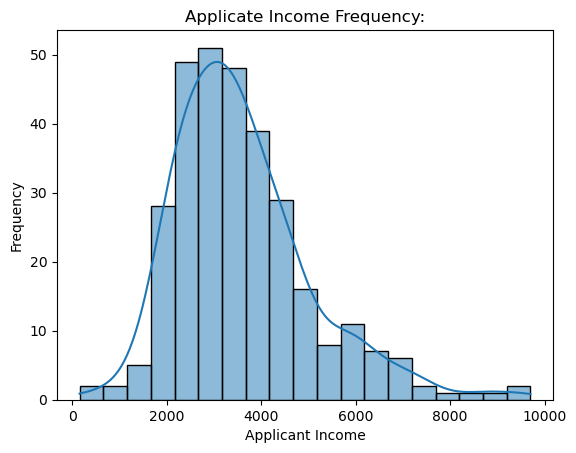

In [10]:
sns.histplot(df['ApplicantIncome'],kde=True)
plt.title("Applicate Income Frequency:")
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.show()

* plot the loan approved based on the gender

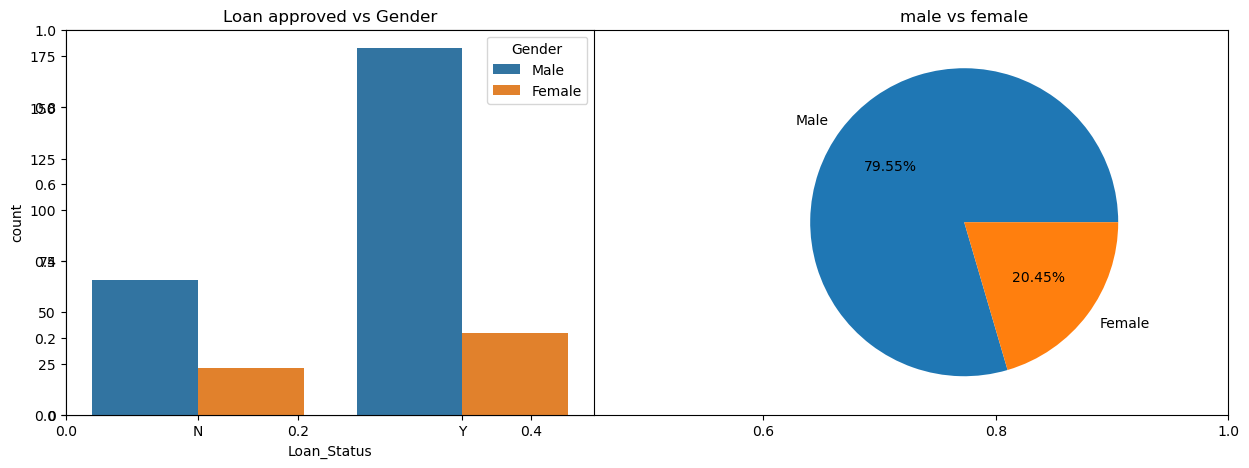

In [12]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.countplot(x='Loan_Status',hue='Gender',data=df)
plt.title('Loan approved vs Gender')

plt.subplot(122)
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('male vs female')
plt.ylabel("")
plt.show()

Loan_Status
Y    219
N     89
Name: count, dtype: int64


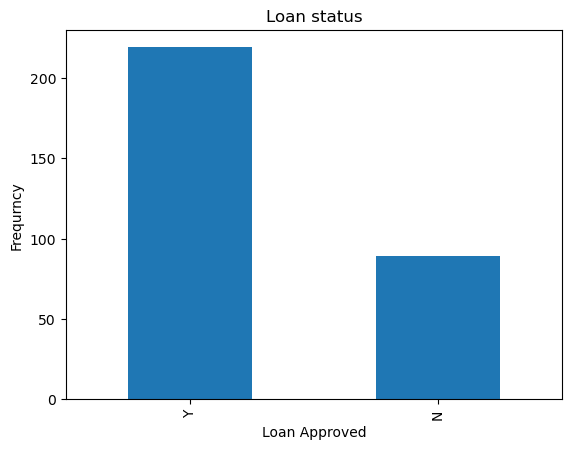

In [13]:
print(df['Loan_Status'].value_counts())
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Loan status')
plt.xlabel('Loan Approved')
plt.ylabel('Frequrncy')
plt.show()

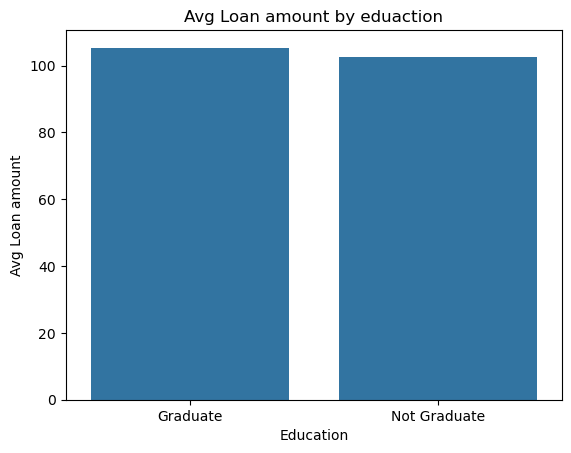

      Education  LoanAmount
0      Graduate  105.344978
1  Not Graduate  102.531646


In [14]:
# group the loan amount with respect to the education
amount_wrt_education=df.groupby('Education')["LoanAmount"].mean().reset_index()
# return a dataframe which contain the mean of the loan amount based on the education lebel
sns.barplot(data=amount_wrt_education,x='Education',y="LoanAmount")
plt.title("Avg Loan amount by eduaction")
plt.ylabel("Avg Loan amount")
plt.show()
print(amount_wrt_education)
# the average for the graduated is 105.34 amd for non graduated is 102.53;

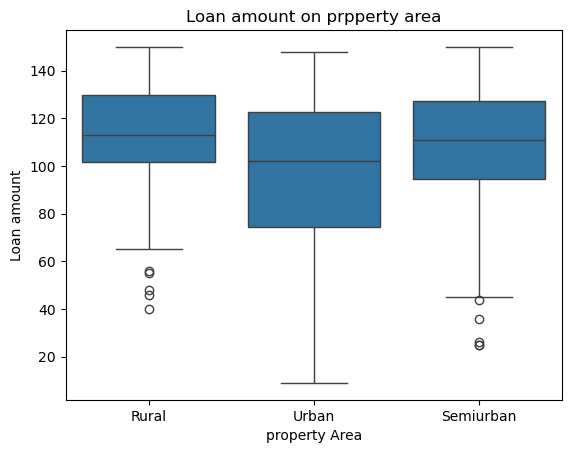

In [15]:
sns.boxplot(data=df,x='Property_Area',y='LoanAmount')
plt.title('Loan amount on prpperty area')
plt.xlabel('property Area')
plt.ylabel('Loan amount')
plt.show()
# it shows some outliers in the rural area amd semoi urban area
# for the rural area; median oan amt is around 110; for urban area it is around 100 ; and for semi urban area it is around 105
#

Loan_Status   N    Y
Married             
No           44   79
Yes          45  140


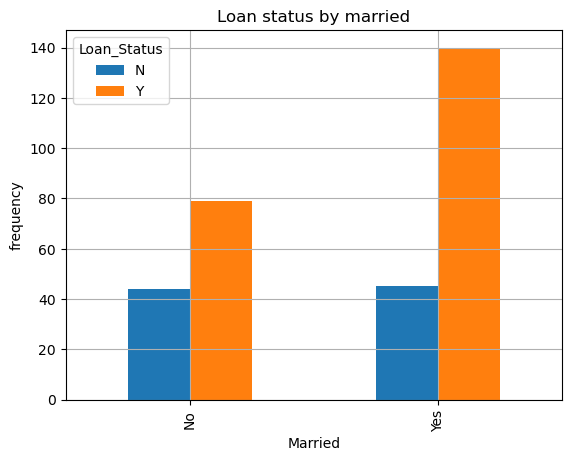

In [16]:
loan_status_by_married=df.groupby('Married')['Loan_Status'].value_counts().unstack()
print(loan_status_by_married)
loan_status_by_married.plot(kind='bar')
plt.title('Loan status by married')
plt.ylabel("frequency")
plt.grid()
plt.show()
# married are offered more loan

In [17]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


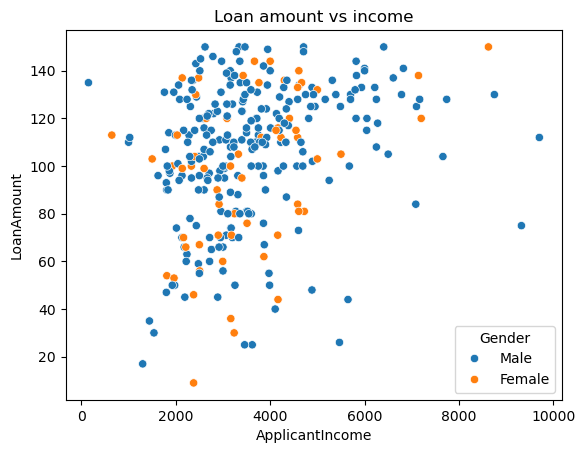

In [18]:
# plot loan amount by income
sns.scatterplot(data=df,x='ApplicantIncome',y='LoanAmount',hue='Gender')
plt.title('Loan amount vs income')
plt.show()

* Find the numeric column and find the correlation

In [20]:
numeric_col=df.select_dtypes(include=['int64','float64'])
numeric_col

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,2333,1516.0,95.0,360.0,1.0
...,...,...,...,...,...
376,5703,0.0,128.0,360.0,1.0
377,3232,1950.0,108.0,360.0,1.0
378,2900,0.0,71.0,360.0,1.0
379,4106,0.0,40.0,180.0,1.0


In [21]:
correlation_matrix=numeric_col.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


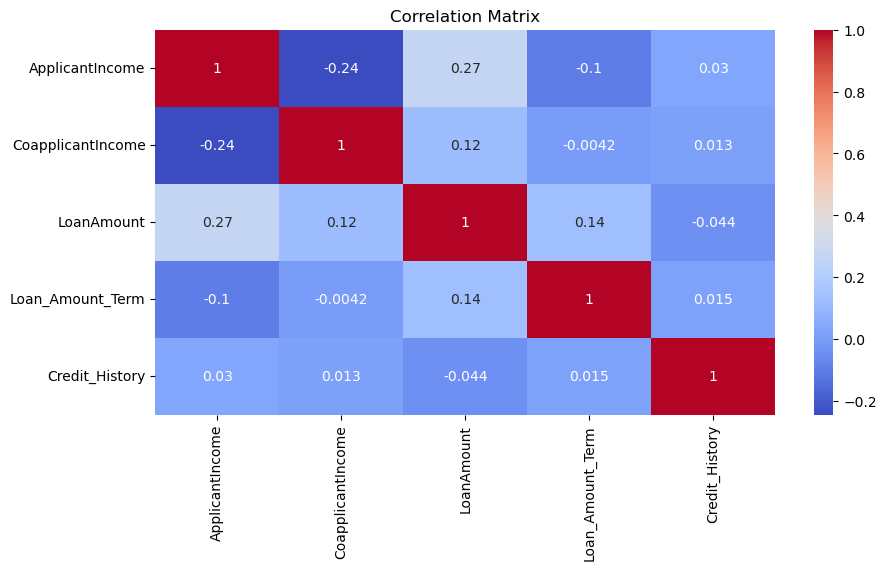

In [22]:
plt.subplots(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

  Self_Employed  Loan_Amount_Term
0            No             342.3
1           Yes             330.0


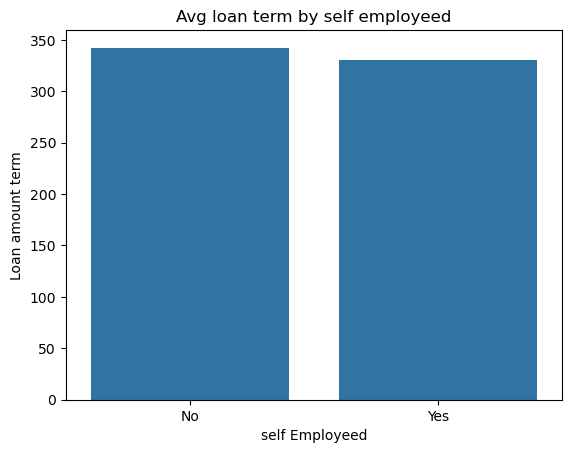

In [24]:
avg_loan_amt_term_by_employed=df.groupby('Self_Employed')['Loan_Amount_Term'].mean().reset_index()
print(avg_loan_amt_term_by_employed)
sns.barplot(x='Self_Employed',y='Loan_Amount_Term',data=avg_loan_amt_term_by_employed)
plt.title('Avg loan term by self employeed')
plt.xlabel('self Employeed')
plt.ylabel('Loan amount term')
plt.show()
# average loan term is more for the non self employeed 

In [25]:
df['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [26]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# seperate X and Y

In [28]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [29]:
x=df[['Gender','Married','Education','ApplicantIncome','LoanAmount','Property_Area','Credit_History']]
y=df[['Loan_Status']]
x.head(5),y.head(5)

(  Gender Married     Education  ApplicantIncome  LoanAmount Property_Area  \
 0   Male     Yes      Graduate             4583       128.0         Rural   
 1   Male     Yes      Graduate             3000        66.0         Urban   
 2   Male     Yes  Not Graduate             2583       120.0         Urban   
 3   Male      No      Graduate             6000       141.0         Urban   
 4   Male     Yes  Not Graduate             2333        95.0         Urban   
 
    Credit_History  
 0             1.0  
 1             1.0  
 2             1.0  
 3             1.0  
 4             1.0  ,
   Loan_Status
 0           N
 1           Y
 2           Y
 3           Y
 4           Y)

* Applying label encoder for y

In [31]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y['Loan_Status']=le.fit_transform(y['Loan_Status'])
y.head(5)

C:\Users\USER\AppData\Local\Temp\ipykernel_11952\1194799022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Loan_Status']=le.fit_transform(y['Loan_Status'])


,Loan_Status
0,0
1,1
2,1
3,1
4,1


* Applying label encoder for x

In [33]:
x['Gender']=le.fit_transform(x['Gender'])
x['Married']=le.fit_transform(x['Married'])
x['Education']=le.fit_transform(x['Education'])
x['Property_Area']=le.fit_transform(x['Property_Area'])

C:\Users\USER\AppData\Local\Temp\ipykernel_11952\4120808359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=le.fit_transform(x['Gender'])
C:\Users\USER\AppData\Local\Temp\ipykernel_11952\4120808359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Married']=le.fit_transform(x['Married'])
C:\Users\USER\AppData\Local\Temp\ipykernel_11952\4120808359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [34]:
x.head(5),y.head(5)

(   Gender  Married  Education  ApplicantIncome  LoanAmount  Property_Area  \
 0       1        1          0             4583       128.0              0   
 1       1        1          0             3000        66.0              2   
 2       1        1          1             2583       120.0              2   
 3       1        0          0             6000       141.0              2   
 4       1        1          1             2333        95.0              2   
 
    Credit_History  
 0             1.0  
 1             1.0  
 2             1.0  
 3             1.0  
 4             1.0  ,
    Loan_Status
 0            0
 1            1
 2            1
 3            1
 4            1)

# scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x=scaler.fit_transform(x)
x.min(),x.max()
# all the values is scaled between -3.259 and 4.18
x

array([[ 0.50709255,  0.81539246, -0.58734842, ...,  0.79689813,
        -1.34675568,  0.41364557],
       [ 0.50709255,  0.81539246, -0.58734842, ..., -1.31665281,
         1.23767266,  0.41364557],
       [ 0.50709255,  0.81539246,  1.70256694, ...,  0.52418188,
         1.23767266,  0.41364557],
       ...,
       [-1.97202659, -1.22640329, -0.58734842, ..., -1.14620515,
        -1.34675568,  0.41364557],
       [ 0.50709255,  0.81539246, -0.58734842, ..., -2.20298062,
        -1.34675568,  0.41364557],
       [-1.97202659, -1.22640329, -0.58734842, ...,  0.96734579,
        -0.05454151, -2.41752858]])

In [37]:
# us this sclaer in fats api tool
import joblib
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

## train test split

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((215, 7), (93, 7), (215, 1), (93, 1))

In [40]:
# defining the function
from sklearn.metrics import accuracy_score

In [41]:
# function to calculate the accuarcy
def modelperformance(predictions):
    print('Accuracy score in model {}'.format(accuracy_score(y_test,predictions)))

* USING LOGISTIC REGRESSION

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [44]:
lr.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1])

In [45]:
lr_prediction=lr.predict(x_test)
modelperformance(lr_prediction)

Accuracy score in model 0.8709677419354839


* USING KNN 

In [47]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    "n_neighbors": [3,6,7,8],
    "weights": ['uniform', 'distance'],
    "algorithm":['auto','ball_tree','kd_tree','brute']}

gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(x_train, y_train.values.ravel())


,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'n_neighbors': [3, 6, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [48]:
# get the best parameter
gridkn.best_params_
# with n_neighbors = 7 and weights =uniform 

{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}

In [49]:
# prediction in knn
knn_pred=gridkn.predict(x_test)
modelperformance(knn_pred)

Accuracy score in model 0.8494623655913979


* USING SVM

In [51]:
from sklearn.svm import SVC

svm=SVC()
para_grid_svc={
    "C":[0.01,0.03,0.05,0.1,0.5],#large C -> risk of overfitting // small C -> risk of underfitting
    "kernel":['linear','poly','rbf','sigmoid'],# decide the shape of the decision boundary
}

gridsvc=GridSearchCV(svm,para_grid_svc)

In [52]:
gridsvc.fit(x_train,y_train.values.ravel())

,estimator,SVC()
,param_grid,"{'C': [0.01, 0.03, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.01


In [53]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [54]:
# make prediction
svc_pred=gridsvc.predict(x_test)
modelperformance(svc_pred)

Accuracy score in model 0.8709677419354839


In [55]:
# take the model suited model i.e svc
joblib.dump(gridsvc,"model.pkl")

['model.pkl']

In [56]:
# converting numpy to pandas
x

array([[ 0.50709255,  0.81539246, -0.58734842, ...,  0.79689813,
        -1.34675568,  0.41364557],
       [ 0.50709255,  0.81539246, -0.58734842, ..., -1.31665281,
         1.23767266,  0.41364557],
       [ 0.50709255,  0.81539246,  1.70256694, ...,  0.52418188,
         1.23767266,  0.41364557],
       ...,
       [-1.97202659, -1.22640329, -0.58734842, ..., -1.14620515,
        -1.34675568,  0.41364557],
       [ 0.50709255,  0.81539246, -0.58734842, ..., -2.20298062,
        -1.34675568,  0.41364557],
       [-1.97202659, -1.22640329, -0.58734842, ...,  0.96734579,
        -0.05454151, -2.41752858]])

In [57]:
# prediction 
import joblib
testmodel=joblib.load('model.pkl')

In [58]:
testmodel.predict([[1,1,0,4583,128.0,0,1.0 ]])[0]

1